In [41]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

In [6]:
def f(x):
    return x**2

In [17]:
def differential(k):
    h = 0.0001
    return (f(k+h) - f(k-h)) / (2*h)

17.99999999995805


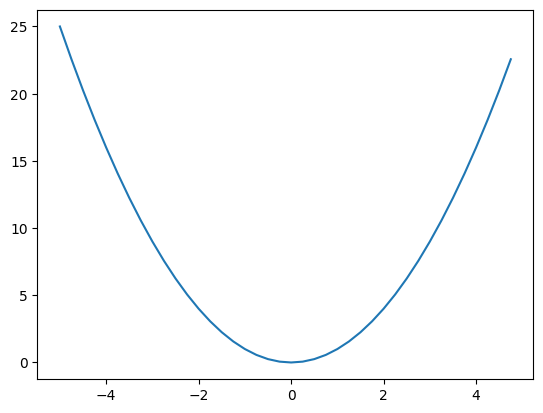

In [19]:
print(differential(f(3)))
xs = np.arange(-5, 5, 0.25)
ys = [f(x) for x in xs]

plt.plot(xs, ys)

In [42]:
class Value:
    def __init__(self, data, _children=(), _op='', label = ''):
        self.data = data
        self._prev = set(_children) # Set of parents, I will pass self and other expression so for x = a + b, a and b will be parents
        self._op = _op # Operation that was used to combine the parents
        self.grad = 0  
        self.label = label
        
        
    # For representing the object as readable string
    def __repr__(self):
        return f"Value(data={self.data} )" 
    
    
    # For adding two objects
    def __add__(self, other):
        return Value(self.data + other.data, (self, other), '+')
    
    # For multiplying two objects
    def __mul__(self, other):
        return Value(self.data * other.data, (self, other), '*')
    


a = Value(1); a.label = 'a'
b = Value(-2); b.label = 'b'
c = Value(3);c.label = 'c'
d = a*b +c
d.label = 'd'

d._prev


        

{Value(data=-2 ), Value(data=3 )}

In [44]:
def trace(root):
    nodes, edges = set(), set()
    
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    
    build(root)
    return nodes, edges

def draw_graph(root):
    nodes, edges = trace(root)
    
    G = nx.DiGraph()
    
    for node in nodes:
        G.add_node(node.label, data=node.data, grad=node.grad, op=node._op)
    
    for n1, n2 in edges:
        G.add_edge(n1.label, n2.label)
    
    node_labels = {node.label: "{ %s | data %.4f | grad %.4f | op %s }" % (node.label, node.data, node.grad, node._op) for node in nodes}
    
    pos = nx.spring_layout(G)
    
    nx.draw(G, pos, labels=node_labels, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, font_weight='bold', arrowsize=20)
    
    plt.show()



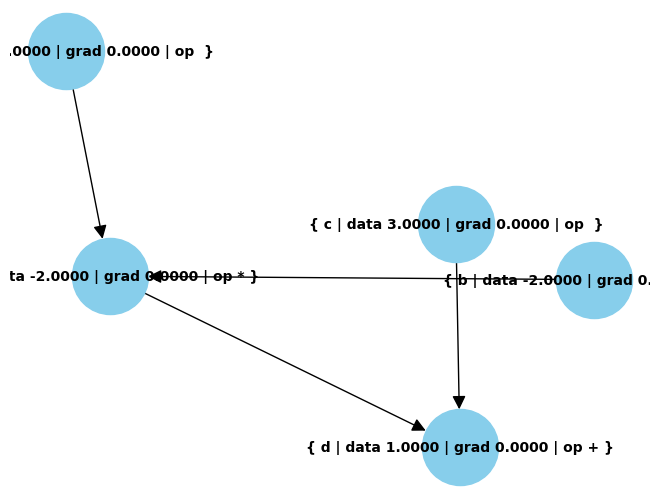

In [45]:
draw_graph(d)

#Doing rest on Kaggle